In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from simulate import simulate
import multiprocessing as mp

### Define jobs to run

In [11]:
jobs = np.zeros((2), dtype=[('N', int), ('N_ill', int), ('Lx', int), ('Ly',int), ('step size',float), ('infection rate',float),\
                           ('pollution rate',float), ('tile infection rate',float), ('time',int)] )

In [12]:
Lx = 30
Ly = 30
stepSize = 0.5
N = 50
N_ill = 1

In [13]:
realisations = 500
tMax = 1000
#---------------N---N_ill--Lx--Ly----step---inf rate--poll rate--tile inf rate--time
jobs[0] = tuple([N, N_ill, Lx, Ly, stepSize, 0.4       , 0.001,        0.001, tMax])
jobs[1] = tuple([N, N_ill, Lx, Ly, stepSize, 0.4       , 0.002,        0.002, tMax])
# jobs[2] = tuple([N, Lx, Ly, stepSize, 0.4       , 0.005,        0.005,       1    ,tMax])
# jobs[3] = tuple([N, Lx, Ly, stepSize, 0.4       , 0.01,        0.01,       1    ,tMax])
# jobs[4] = tuple([N, Lx, Ly, stepSize, 0.4       , 0.02,        0.02,       1    ,tMax])
# jobs[5] = tuple([N, Lx, Ly, stepSize, 0.4       , 0.05,        0.05,       1    ,tMax])
# jobs[6] = tuple([N, Lx, Ly, stepSize, 0.4       , 0.1,        0.1,       1    ,tMax])
# jobs[7] = tuple([N, Lx, Ly, stepSize, 0.4       , 0.2,        0.2,       1    ,tMax])

lbls = [str(job['pollution rate']) + "," + str(job['tile infection rate']) for job in jobs]

In [14]:
%%time
results = []
if __name__ ==  '__main__':
    i=0
    for job in jobs:
        i+=1
        works = [job for i in range(realisations)]
        with mp.Pool(mp.cpu_count()) as pool:
            p_r = pool.map_async(simulate, works)
            results.append(p_r.get())
        print('Job '+str(i)+" Done!")

Job 1 Done!
Job 2 Done!
Wall time: 3min 22s


In [15]:
for i in range(len(results)):
    for j in range(len(results[i])):
        results[i][j] = (results[i][j]['from_per'].cumsum(), results[i][j]['from_env'].cumsum())

In [35]:
errors[1]

(1000,)

### Plot results

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

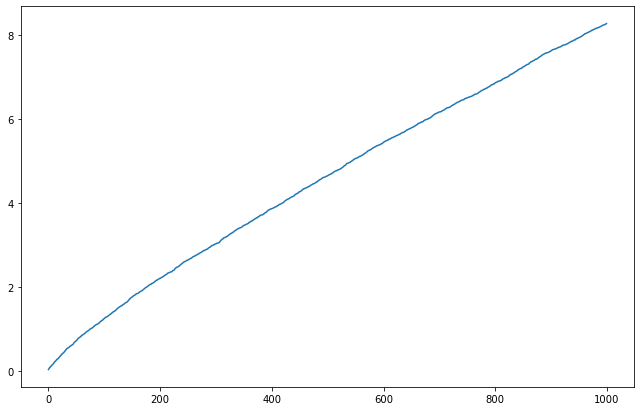

In [36]:
t = np.arange(tMax)
ts = [np.mean(res, axis=0) for res in results]
errors = [np.std(res, axis=0) for res in results]
fig, ax = plt.subplots(figsize=(11, 7))
for i in range(jobs.shape[0]):
    plt.plot(t, np.sum(ts[i], axis=0), label=lbls[i])
    ax.fill_between(t, np.sum(ts[i], axis=0)+np.sum(errors[i], axis=0)/2, np.sum(ts[i], axis=0)-errors[i]/2, alpha=0.5)
ax.set_xlabel("t")
ax.set_ylabel("Number of exposed people")
ax.set_title("")
ax.legend()

#### you want pop density? run this!

In [7]:
results_dens = [results[i]/jobs[i][0] for i in range(jobs.shape[0])]

No handles with labels found to put in legend.


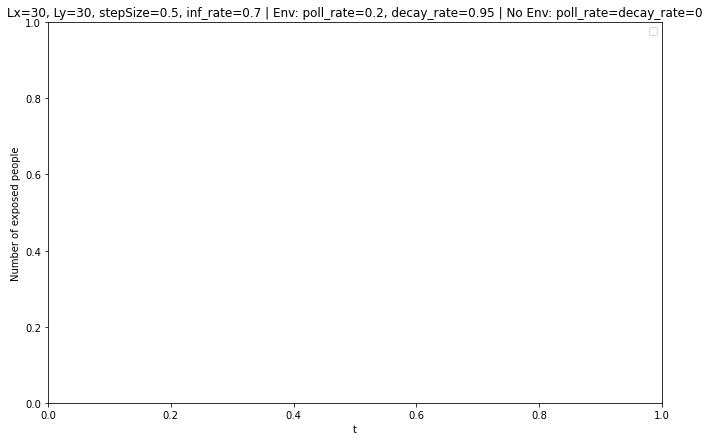

In [8]:
t = np.arange(tMax)
ts = [np.mean(res, axis=0) for res in results_dens]
errors = [np.std(res, axis=0) for res in results_dens]
fig, ax = plt.subplots(figsize=(11, 7))
for i in range(8,jobs.shape[0]):
    plt.plot(t, ts[i], label=lbls[i])
#     ax.fill_between(t, ts[i]+errors[i]/2, ts[i]-errors[i]/2, alpha=0.5)
ax.set_xlabel("t")
ax.set_ylabel("Number of exposed people")
ax.set_title("Lx="+str(Lx)+", Ly="+str(Ly)+", stepSize="+str(stepSize)+", inf_rate=0.7 | Env: poll_rate="+str(0.2)+", decay_rate="+str(0.95)+" | No Env: poll_rate=decay_rate=0")
ax.legend()

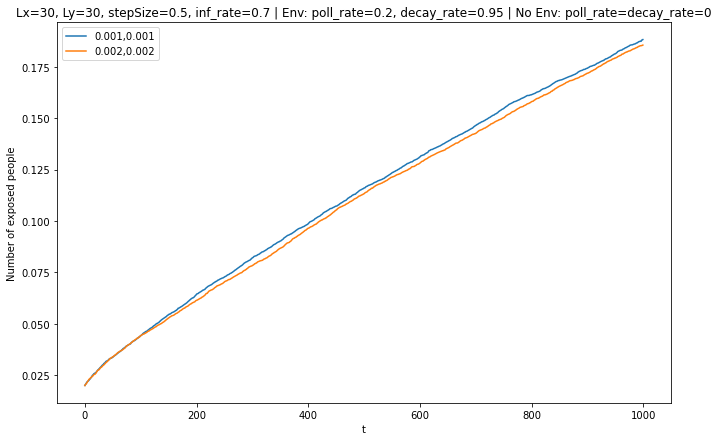

In [9]:
t = np.arange(tMax)
ts = [np.mean(res, axis=0) for res in results_dens]
errors = [np.std(res, axis=0) for res in results_dens]
fig, ax = plt.subplots(figsize=(11, 7))
for i in range(2):
    plt.plot(t, ts[i], label=lbls[i])
#     ax.fill_between(t, ts[i]+errors[i]/2, ts[i]-errors[i]/2, alpha=0.5)
ax.set_xlabel("t")
ax.set_ylabel("Number of exposed people")
ax.set_title("Lx="+str(Lx)+", Ly="+str(Ly)+", stepSize="+str(stepSize)+", inf_rate=0.7 | Env: poll_rate="+str(0.2)+", decay_rate="+str(0.95)+" | No Env: poll_rate=decay_rate=0")
ax.legend()